<a href="https://colab.research.google.com/github/ahsan-javed-ds/linear-regression-model-series/blob/main/linear_regression_seoul_bike_rented_data_ahsan_javed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementation of Linear Regression Model -- Seoul Bike Sharing Demand**

**Author of this notebook:** Ahsan Javed

**Email:** ahsan.javed1702@gmail.com

**GitHub:** https://github.com/ahsan-javed-ds

**LinkedIn:** https://www.linkedin.com/in/ahsan-javed17/

**Video Reference for this noteboook:** https://www.youtube.com/watch?v=i_LwzRVP7bg

# **Dataset Information:**

The dataset used in this notebook has been taken from: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

## Details:

The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information.

Dataset Characteristics: Multivariate

Subject Area: Business

Associated Tasks: Regression

Feature Type: Integer, Real

\# Instances: 8760

\# Features: 13

# **1. Downloading Dependencies**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [2]:
# To suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# **2. Data loading**


Data can loaded from Colab (by uploading) or can also load the data from google drive (but need to mount the drive first)



In [3]:
# If you want to load the data from the google drive and saving the final model

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
try:
    df = pd.read_csv('/content/SeoulBikeData.csv', encoding='latin-1')
    # df = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', encoding='latin-1') # if uploading csv from drive
    display(df.head())

except FileNotFoundError:
    print("Error: 'SeoulBikeData.csv' not found.")
except Exception as e:
    print(f"An error occurred: {e}")

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# **3. Exploratory Data Analysis (EDA)**


Examining the shape of the DataFrame:



In [5]:
print("Shape of the DataFrame:", df.shape)

Shape of the DataFrame: (8760, 14)


 Check the data types:

In [6]:
print("\nData Types:\n", df.dtypes)


Data Types:
 Date                          object
Rented Bike Count              int64
Hour                           int64
Temperature(°C)              float64
Humidity(%)                    int64
Wind speed (m/s)             float64
Visibility (10m)               int64
Dew point temperature(°C)    float64
Solar Radiation (MJ/m2)      float64
Rainfall(mm)                 float64
Snowfall (cm)                float64
Seasons                       object
Holiday                       object
Functioning Day               object
dtype: object


Calculating the descriptive statistics:

In [7]:
print("\nDescriptive Statistics:\n", df.describe())


Descriptive Statistics:
        Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000     

Analyzing the distribution of numerical & categorical features:

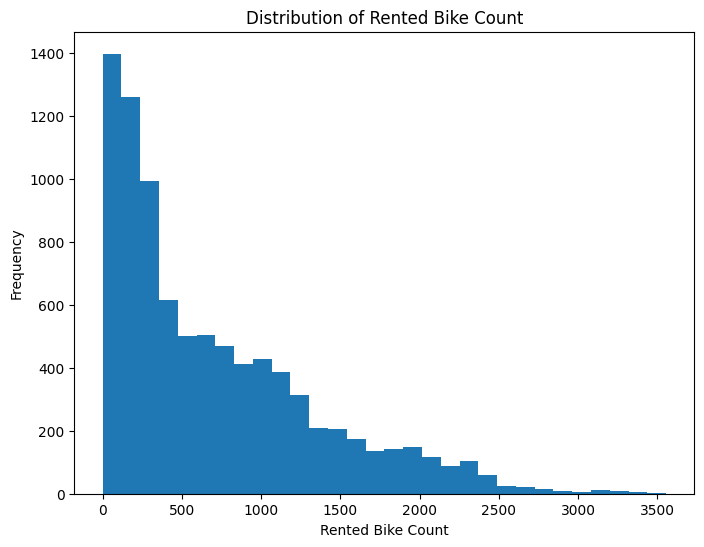

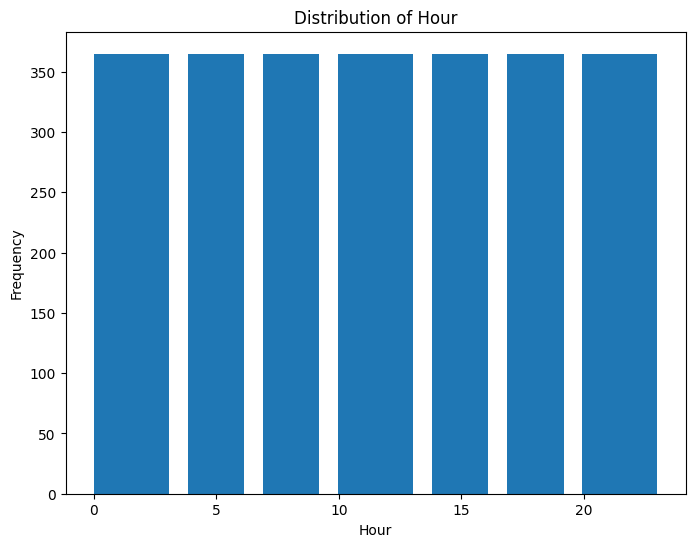

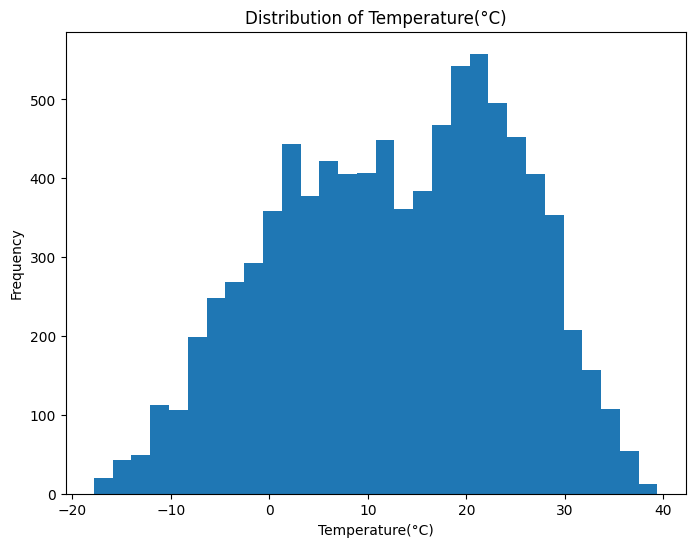

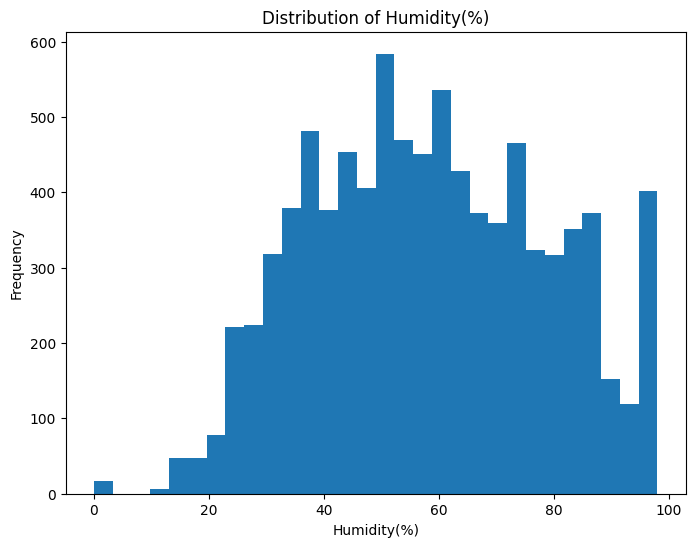

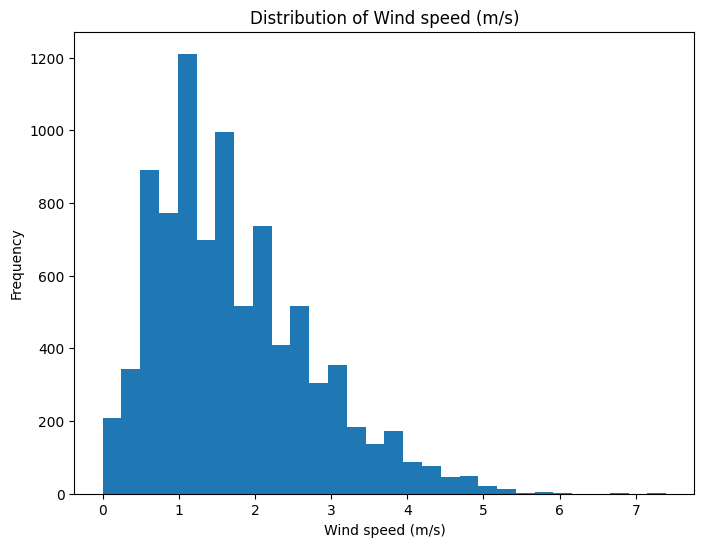

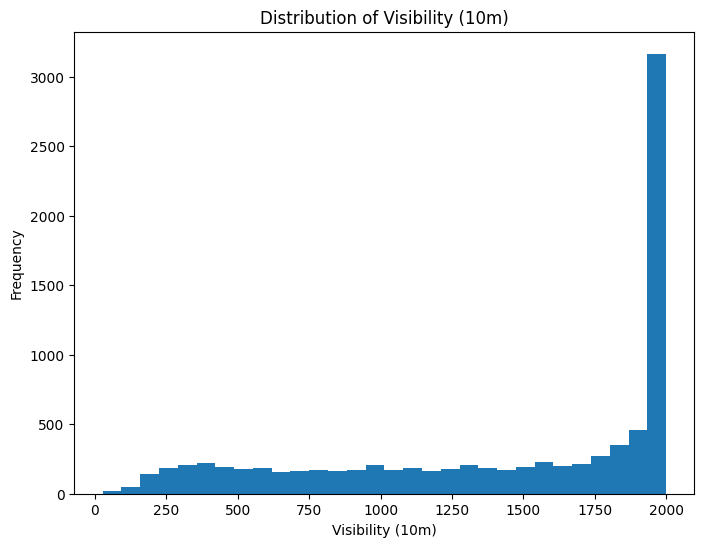

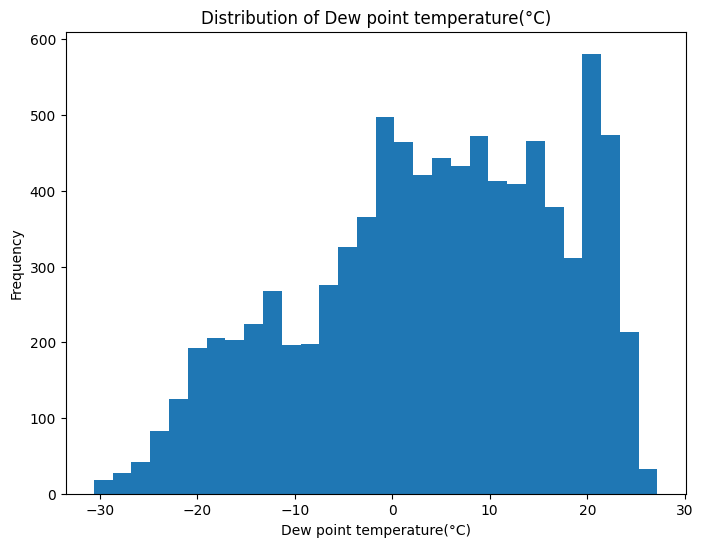

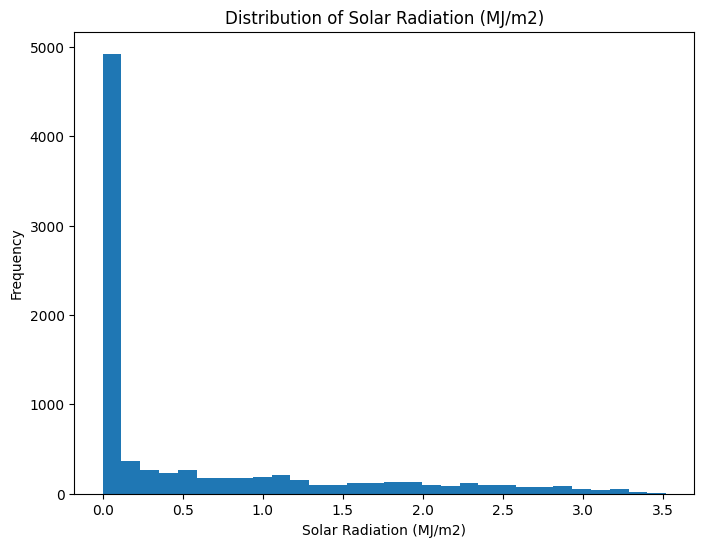

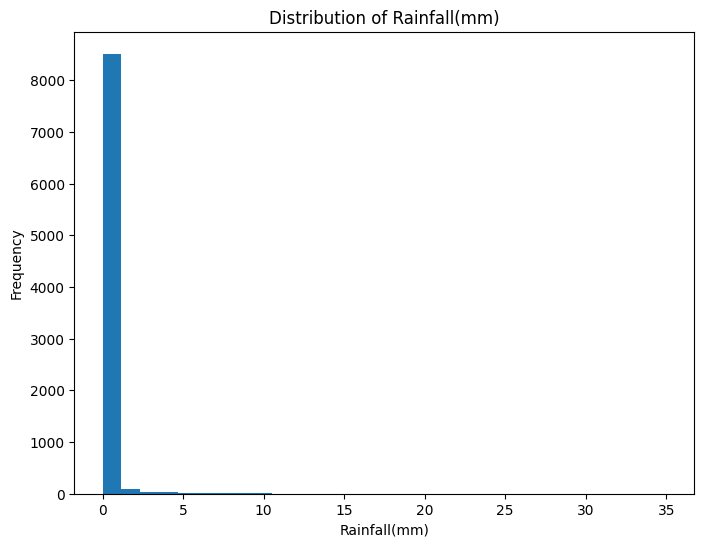

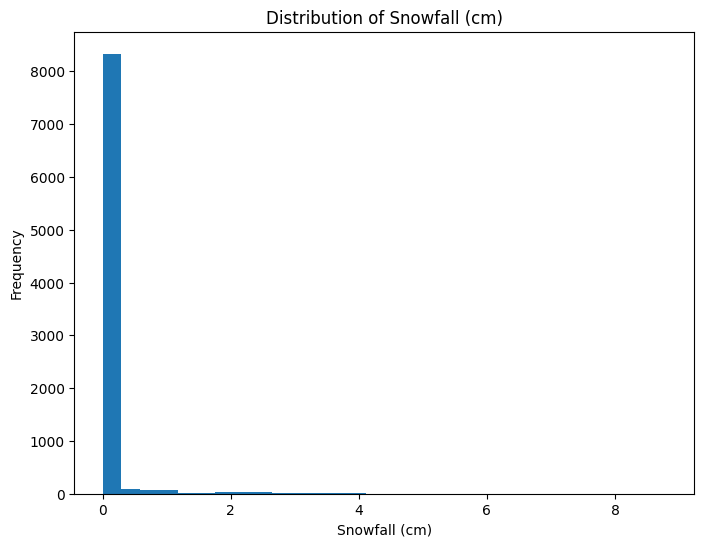

In [8]:
# Analyzing the distribution of numerical features
import matplotlib.pyplot as plt
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    df[col].plot(kind='hist', bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

A frequency vs. any other features (like Rented Bike Count, Hours, Snowfall graph, like a histogram, shows how often different values or ranges of values for a specific feature occur within a dataset. The height of each bar in the graph represents the frequency (count) of data points falling within that particular value range of the feature.

In [9]:
# Analyzing the distribution of categorical features
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    print(f'\nDistribution of {col}:\n{df[col].value_counts()}\n================================')


Distribution of Date:
Date
30/11/2018    24
01/12/2017    24
02/12/2017    24
03/12/2017    24
04/12/2017    24
              ..
18/12/2017    24
17/12/2017    24
16/12/2017    24
15/12/2017    24
14/12/2017    24
Name: count, Length: 365, dtype: int64

Distribution of Seasons:
Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

Distribution of Holiday:
Holiday
No Holiday    8328
Holiday        432
Name: count, dtype: int64

Distribution of Functioning Day:
Functioning Day
Yes    8465
No      295
Name: count, dtype: int64


Check for the missing values:

In [10]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


Identifying the potential outliers using box plots:

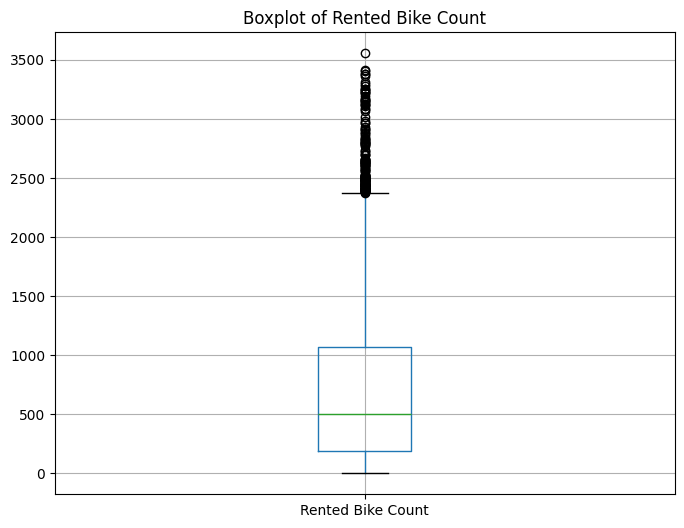

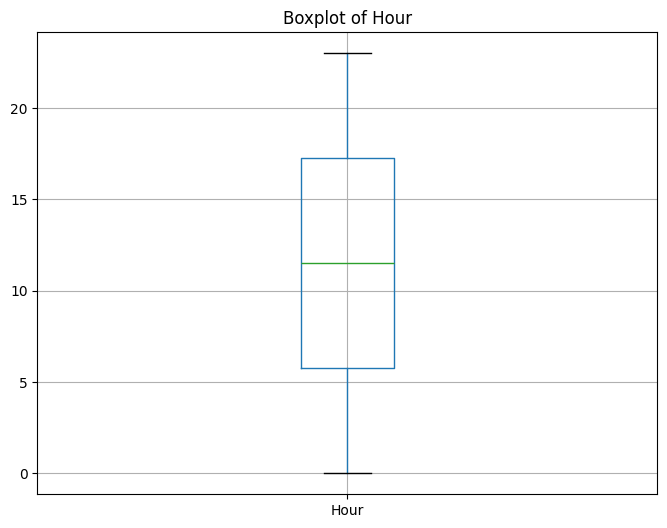

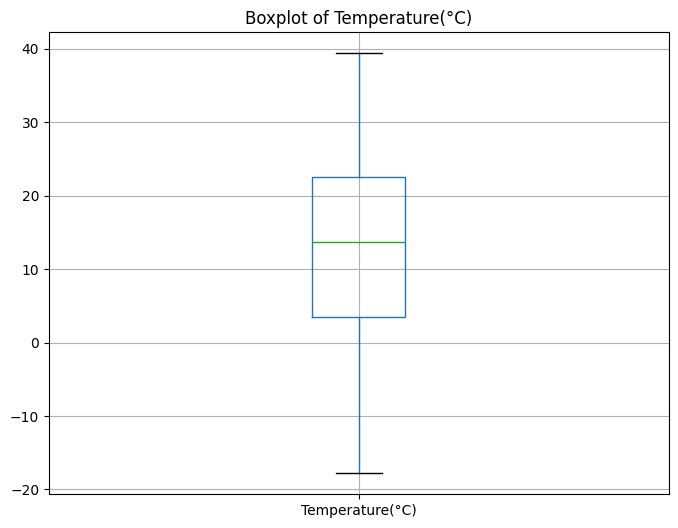

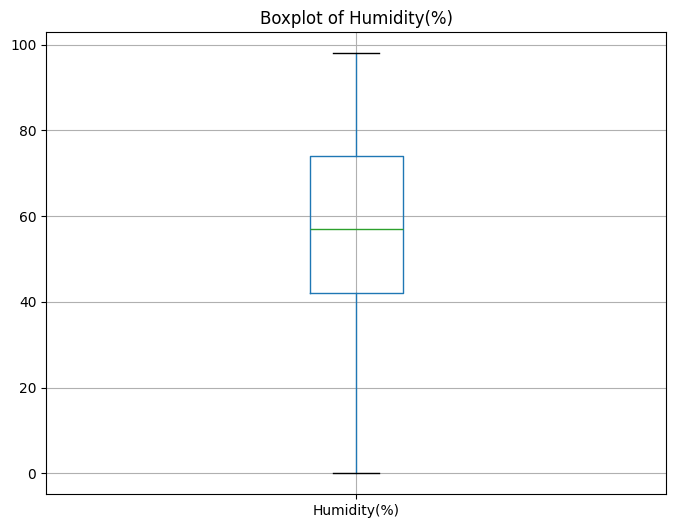

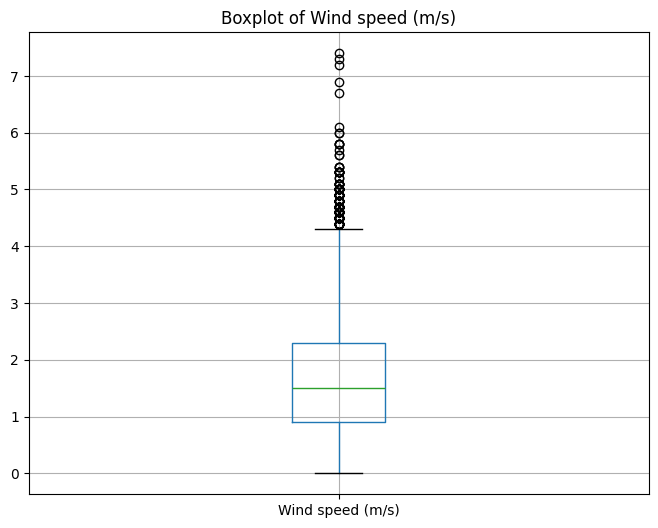

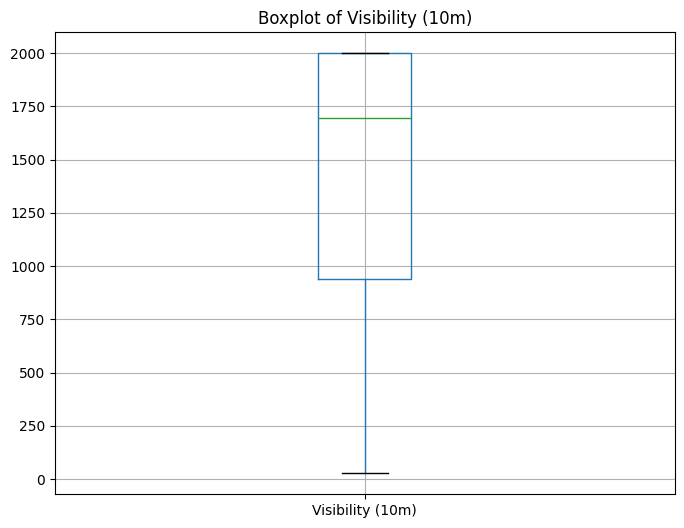

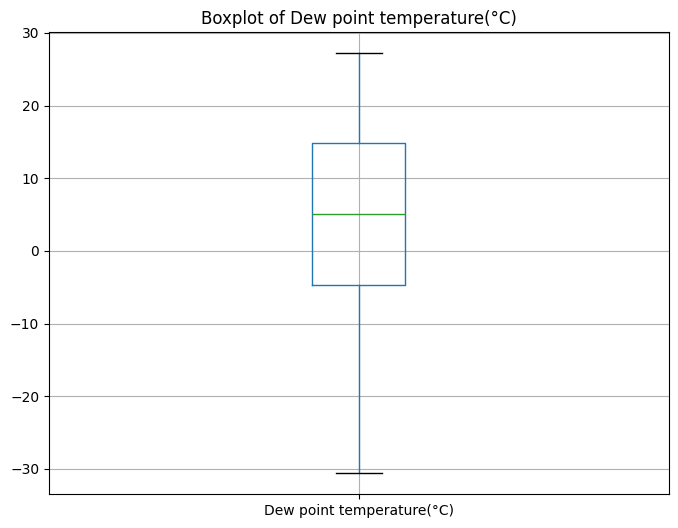

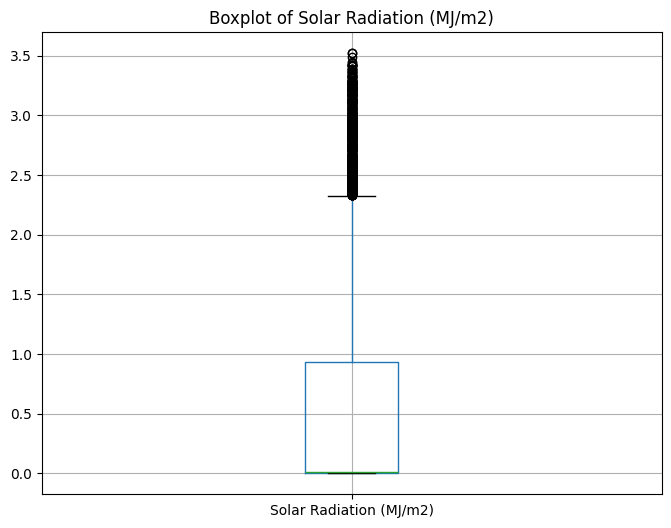

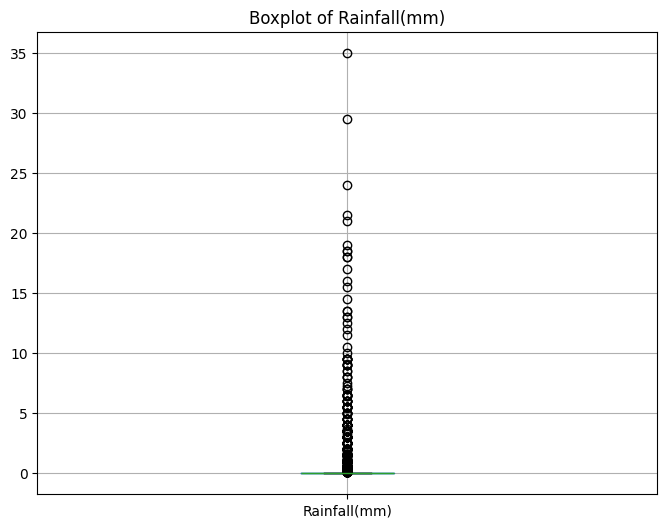

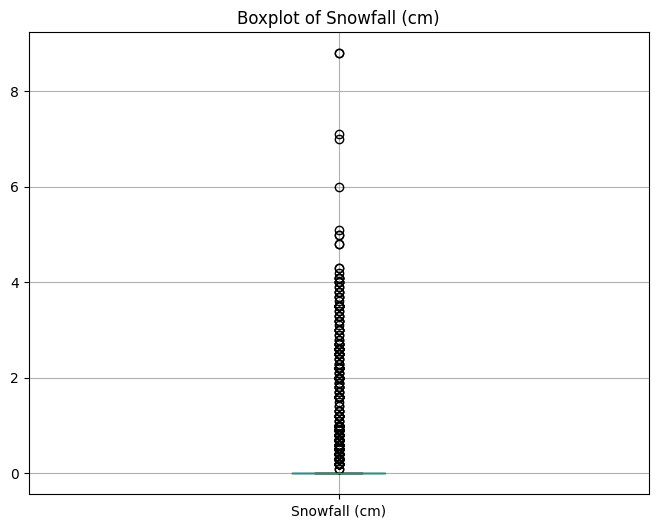

In [11]:
# Identify potential outliers using box plots
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    df.boxplot(column=[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

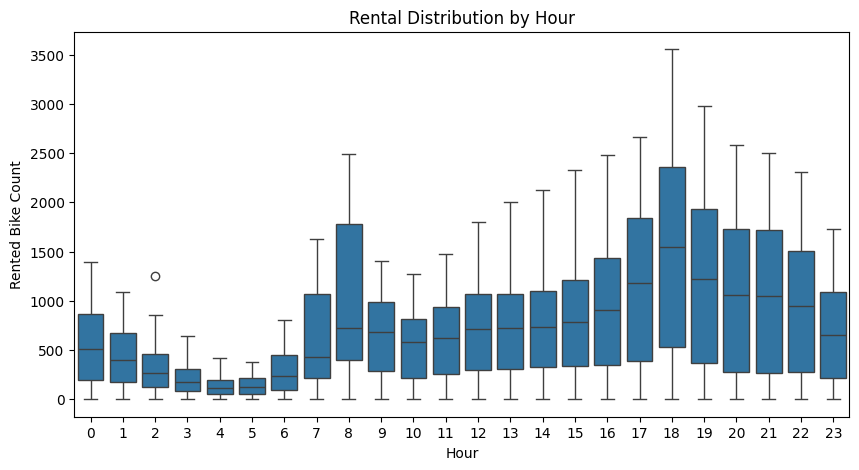

In [12]:
# Rentals by hour
plt.figure(figsize=(10,5))
sns.boxplot(x="Hour", y="Rented Bike Count", data=df)
plt.title("Rental Distribution by Hour")
plt.show()

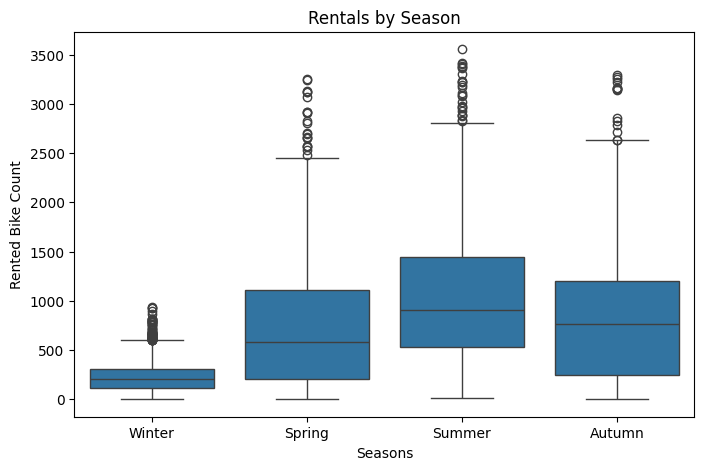

In [13]:
# Rentals by season
plt.figure(figsize=(8,5))
sns.boxplot(x="Seasons", y="Rented Bike Count", data=df)
plt.title("Rentals by Season")
plt.show()

The above box plots showing the outlier values for multiple features. The

Text(0.5, 1.0, 'Rented Bike Count vs. Temperature')

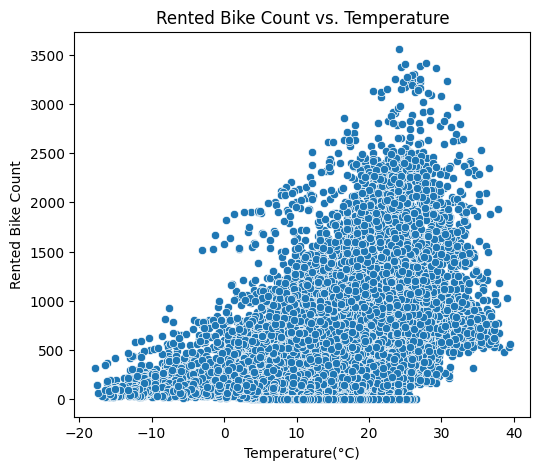

In [14]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Temperature(°C)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Temperature')

**Temperature (C):** Shows a positive correlation with Rented Bike Count; warmer temperatures generally lead to more rentals.

Text(0.5, 1.0, 'Rented Bike Count vs. Hour')

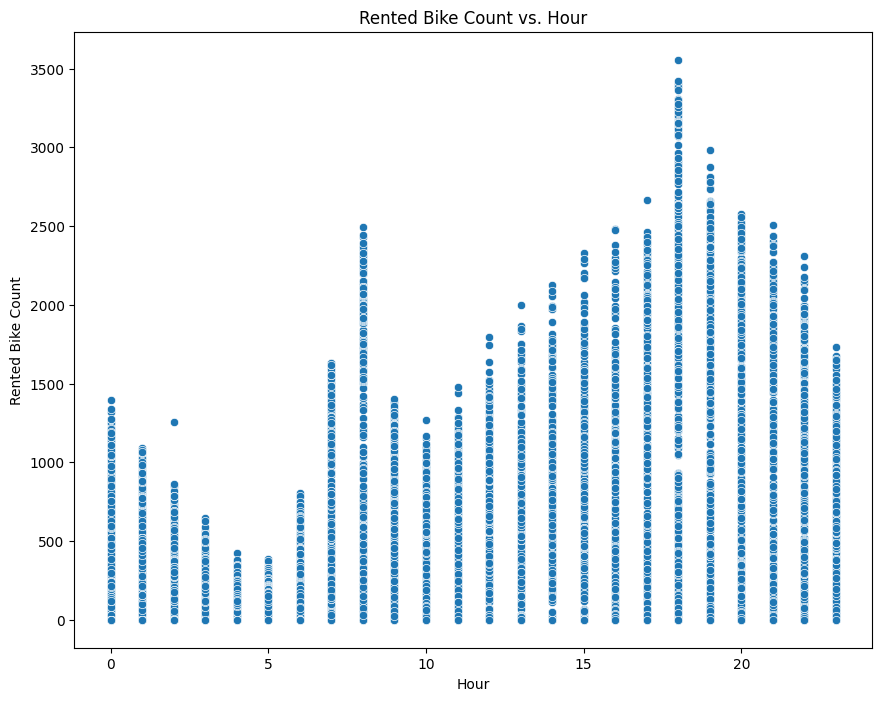

In [15]:
plt.figure(figsize=(35, 8))
plt.subplot(1, 3, 2)
sns.scatterplot(x='Hour', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Hour')

**Hour:** There's a clear pattern with hour, showing peaks during morning and evening rush hours for bike rentals.

Text(0.5, 1.0, 'Rented Bike Count vs. Humidity(%)')

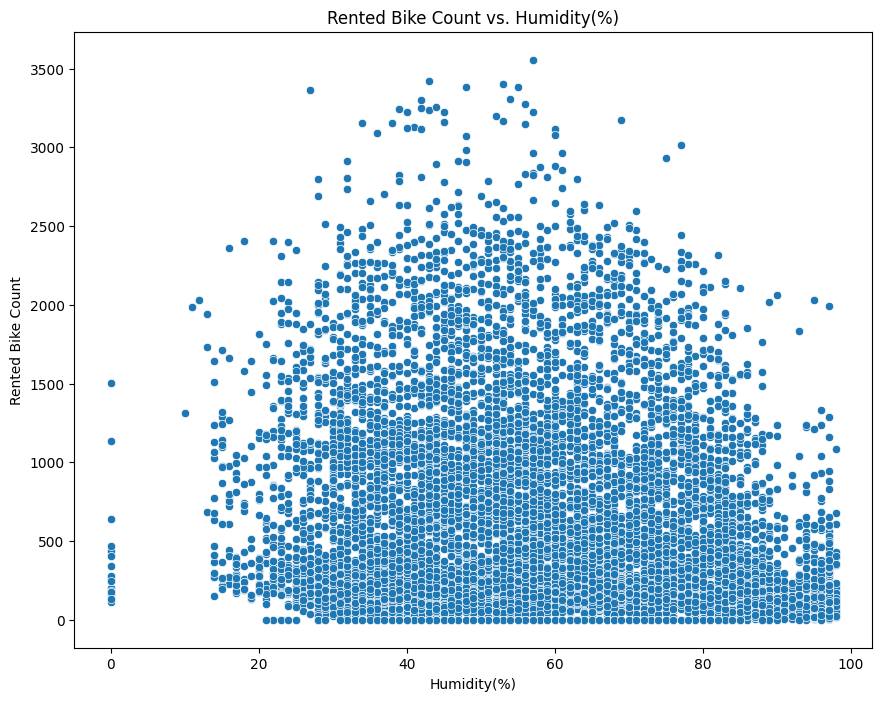

In [16]:
plt.figure(figsize=(35, 8))
plt.subplot(1, 3, 2)
sns.scatterplot(x='Humidity(%)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Humidity(%)')

**Humidity (%):** Tends to have a negative correlation with rented_bike_count.

Text(0.5, 1.0, 'Rented Bike Count vs. Solar Radiation (MJ/m2)')

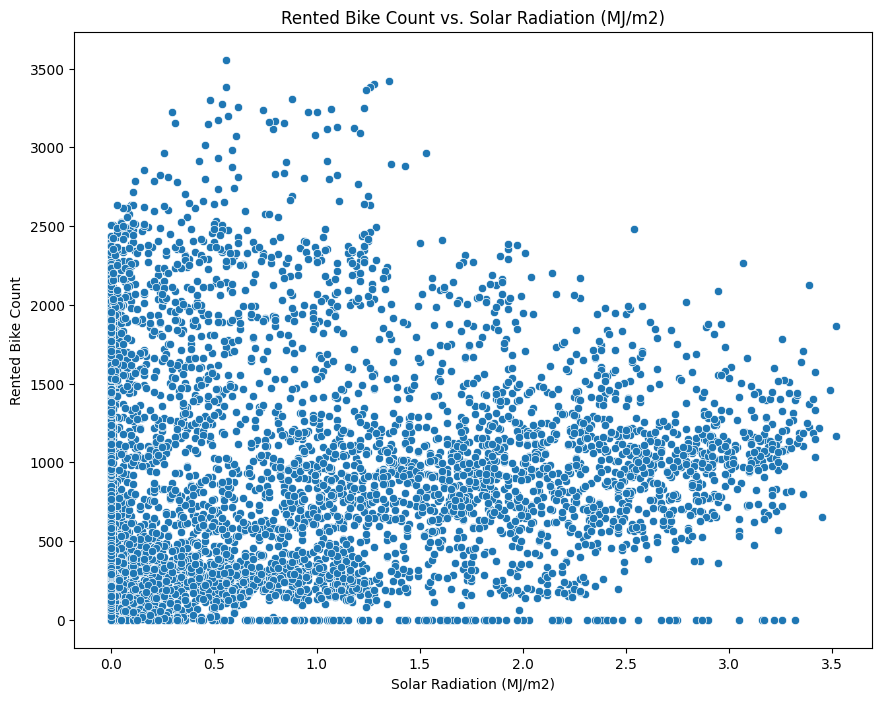

In [17]:
plt.figure(figsize=(35, 8))
plt.subplot(1, 3, 3)
sns.scatterplot(x='Solar Radiation (MJ/m2)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Solar Radiation (MJ/m2)')

**Solar Radiation (MJ/m2):** Positively correlated with rented_bike_count.

Text(0.5, 1.0, 'Rented Bike Count vs. Visibility (10m)')

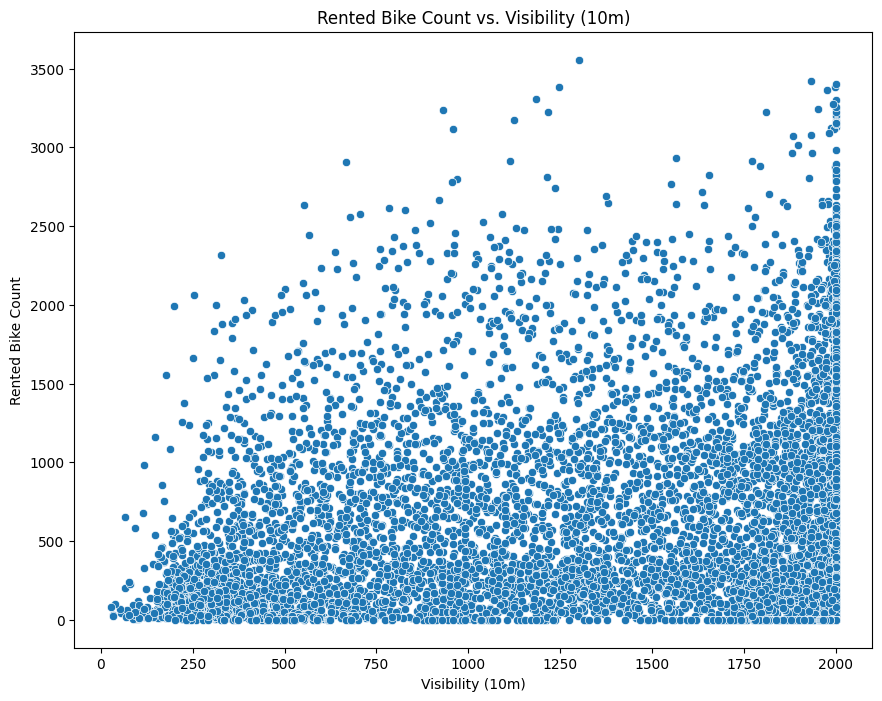

In [18]:
plt.figure(figsize=(35, 8))
plt.subplot(1, 3, 3)
sns.scatterplot(x='Visibility (10m)', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Visibility (10m)')

Higher Visibility means higher chances of more rented bike counts

Text(0.5, 1.0, 'Rented Bike Count vs. Seasons')

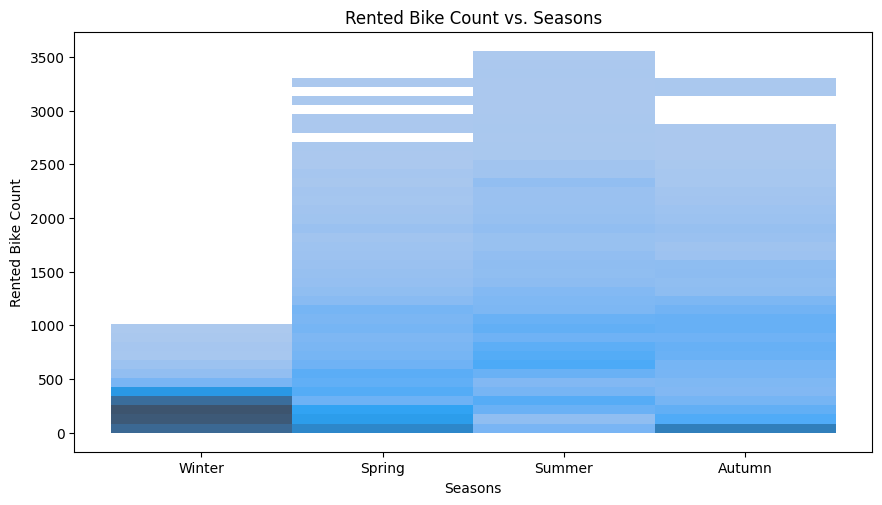

In [19]:
plt.figure(figsize=(35, 12))
plt.subplot(2, 3, 1)
sns.histplot(x='Seasons', y='Rented Bike Count', data=df)
plt.title('Rented Bike Count vs. Seasons')

**Seasons:** Bike rentals are significantly higher in 'Summer' and 'Autumn' compared to 'Spring' and 'Winter'.

# **4. Data Preprocessing and Feature Selection**

Converting Date to datetime object:

In [20]:
# Convert Date to datetime
df["Date"] = pd.to_datetime(df["Date"], format="%d/%m/%Y")
print(df["Date"].head())

0   2017-12-01
1   2017-12-01
2   2017-12-01
3   2017-12-01
4   2017-12-01
Name: Date, dtype: datetime64[ns]


Extract useful features from the Date e.g. 'year', 'month', and 'day':

In [21]:
# Extract day, month from Date
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

Dropping 'Date' column as it's now encoded:

In [22]:
df.drop("Date", axis=1, inplace=True)

Encoding the categorical features like 'Holiday', 'Functioning Day', and 'Seasons' because the ML algorithms works on Numerical input:

In [23]:
df["Holiday"] = df["Holiday"].map({"No Holiday": 0, "Holiday": 1})
df["Functioning Day"] = df["Functioning Day"].map({"Yes": 1, "No": 0})
df = pd.get_dummies(df, columns=["Seasons"], drop_first=True)

In [24]:
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True


Generating a Correlation Matrix:

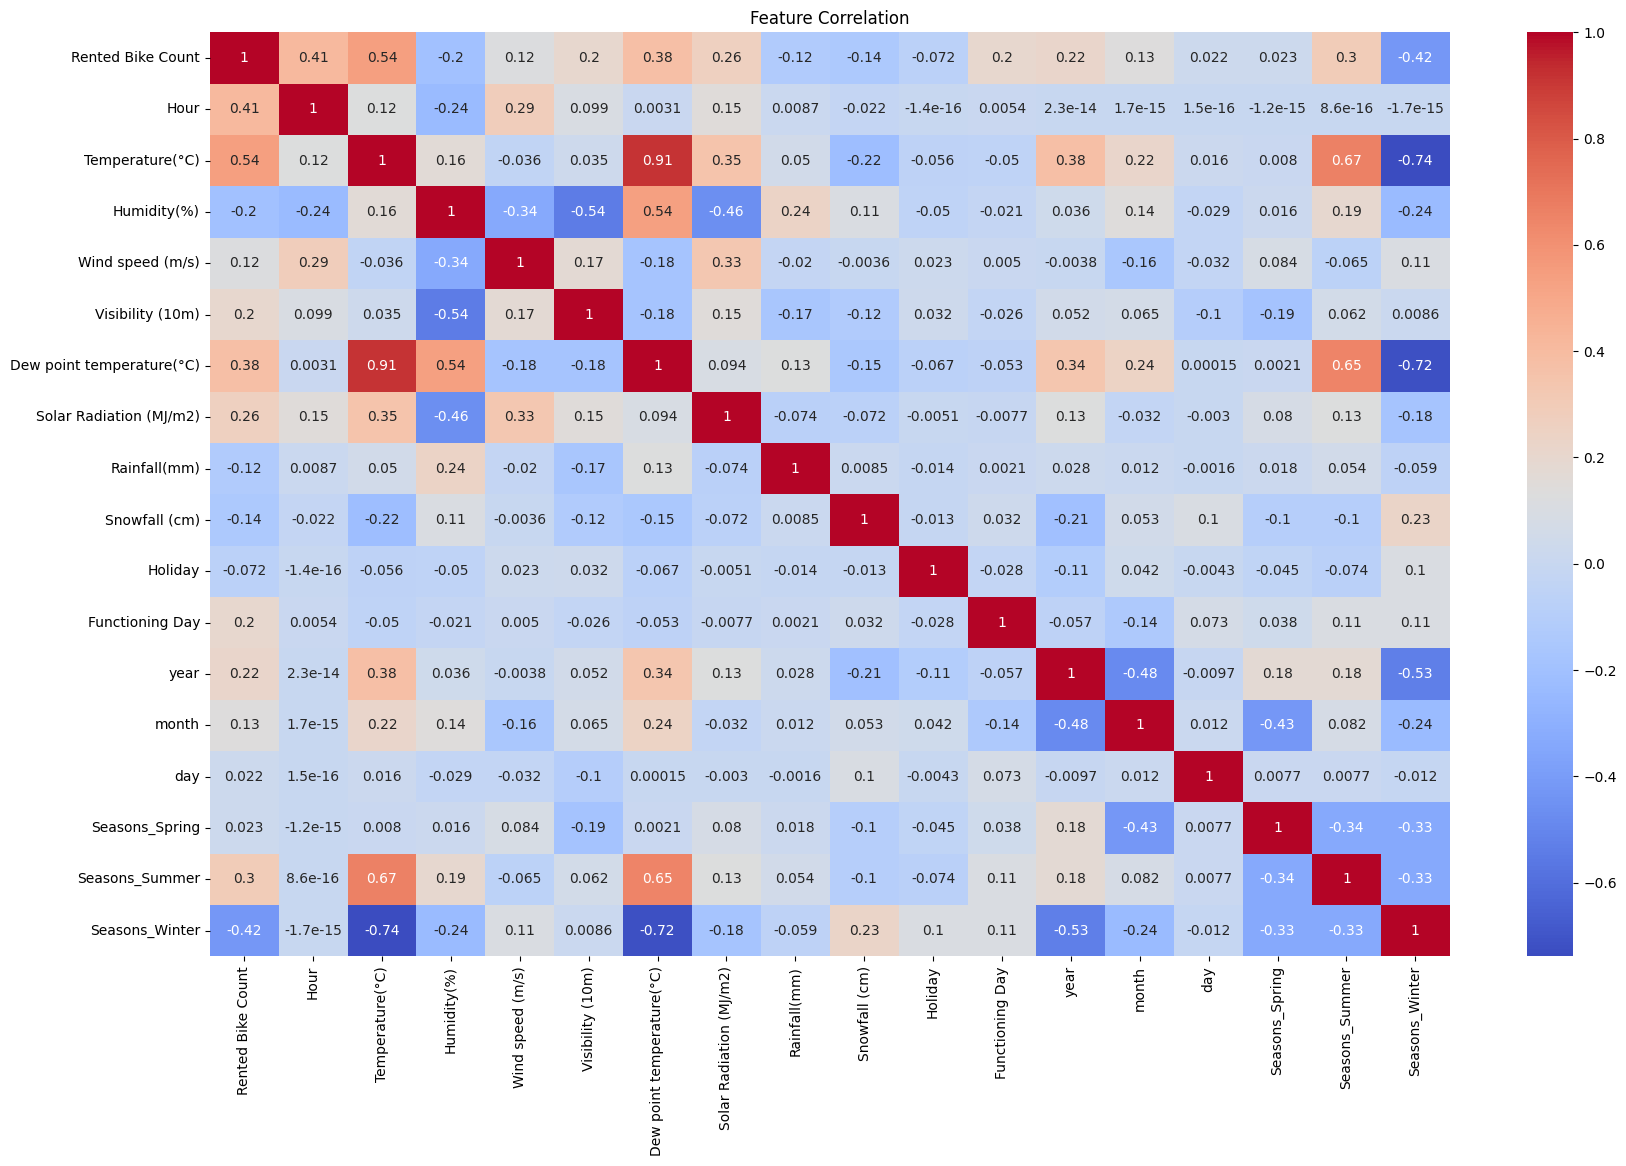

In [25]:
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Feature Correlation")
plt.show()

# **5. Feature Engineering**

Simplifying the column names for ease of model training and evaluation now:

In [26]:
# First checking the existing column names
df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,year,month,day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True


In [27]:
new_columns = ['rented_bike_count', 'hour', 'temp_celcius', 'humidity_%', 'wind_speed_ms', 'visibility_10m', 'dew_point_celcius', 'solar_radiation_mj_m2', 'rainfall_mm', 'snowfall_cm', 'holiday', 'functioning_day', 'year', 'month', 'day', 'season_spring', 'season_summer', 'season_winter']
df.columns = new_columns
df.head()

,rented_bike_count,hour,temp_celcius,humidity_%,wind_speed_ms,visibility_10m,dew_point_celcius,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,holiday,functioning_day,year,month,day,season_spring,season_summer,season_winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,2017,12,1,False,False,True


Selecting the Target variable before Model Training:

In [28]:
target = 'rented_bike_count'
print(f"Target variable: {target}")

Target variable: rented_bike_count


## Features for Model Training:

Checking the correlation with the target:

In [29]:
correlation = df.corr(numeric_only=True)["rented_bike_count"].sort_values(ascending=False)
print(correlation)

rented_bike_count        1.000000
temp_celcius             0.538558
hour                     0.410257
dew_point_celcius        0.379788
season_summer            0.296549
solar_radiation_mj_m2    0.261837
year                     0.215162
functioning_day          0.203943
visibility_10m           0.199280
month                    0.133514
wind_speed_ms            0.121108
season_spring            0.022888
day                      0.022291
holiday                 -0.072338
rainfall_mm             -0.123074
snowfall_cm             -0.141804
humidity_%              -0.199780
season_winter           -0.424925
Name: rented_bike_count, dtype: float64


***Dropping the Irrelevant Features from the dataset for efficient Model Training by reducing multicollinearity (would create issues for Linear Regression Models):***

**Reason for dropping:**

1. **Date**: We've extracted 'year', 'month', 'day', 'day_of_week' from it, making the original 'date' redundant (already dropped earlier).

2. **year**: If the dataset covers only one year or if trends are primarily captured by 'seasons' and 'months', 'year' might not add significant value.

3. **dew_point_celcius**: This feature is highly correlated with 'temp_celcius' (as seen in the correlation matrix, often >0.9).

In [30]:
features_to_drop = ['year', 'dew_point_celcius']
df_featured = df.drop(columns=features_to_drop)
df_featured.head()

,rented_bike_count,hour,temp_celcius,humidity_%,wind_speed_ms,visibility_10m,solar_radiation_mj_m2,rainfall_mm,snowfall_cm,holiday,functioning_day,month,day,season_spring,season_summer,season_winter
0,254,0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,1,12,1,False,False,True
1,204,1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,1,12,1,False,False,True
2,173,2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,1,12,1,False,False,True
3,107,3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,1,12,1,False,False,True
4,78,4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,1,12,1,False,False,True


***Handle categorical features using One-Hot Encoding:***

-> One-Hot Encoding converts categorical variables into a format that can be provided to ML algorithms to do a better job in prediction.

-> `drop_first=True` is used to avoid multicollinearity (the dummy variable trap).

-> `month` is treated as categorical here because their numerical value doesn't imply order or linear relationship that a regression model would assume. For example, month 12 is not "twice" month 6 in terms of impact.

In [31]:
categorical_cols_for_ohe = ['holiday', 'functioning_day', 'month']
df_featured = pd.get_dummies(df_featured, columns=categorical_cols_for_ohe, drop_first=True)

print("\nDataFrame columns after Feature Engineering (for model training):")
print(df_featured.columns)


DataFrame columns after Feature Engineering (for model training):
Index(['rented_bike_count', 'hour', 'temp_celcius', 'humidity_%',
       'wind_speed_ms', 'visibility_10m', 'solar_radiation_mj_m2',
       'rainfall_mm', 'snowfall_cm', 'day', 'season_spring', 'season_summer',
       'season_winter', 'holiday_1', 'functioning_day_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12'],
      dtype='object')


The information about `month_1` is still implicitly available. If all the other month columns (`month_2`, `month_3`, ..., `month_12`) for a given row are 0, it means that the month for that row is `month_1`.

### Finally selecting the Features and target variable as `X` and `Y` respectively for model training.

In [32]:
X = df_featured.drop(columns=[target]) # Features
y = df_featured[target]                 # Target variable

# **6. Model Training**

**`Train` and `Test` Split:**

-> Spliting the data into `80%` for training and `20%` for testing.

->`random_state` ensures reproducibility of the split.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Testing set shape: X_test {X_test.shape}, y_test {y_test.shape}")


Training set shape: X_train (7008, 25), y_train (7008,)
Testing set shape: X_test (1752, 25), y_test (1752,)


### Initializing and train a Linear Regression model

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)
print("\nLinear Regression Model Training has been completed successfully")


Linear Regression Model Training has been completed successfully


# **7. Model Evaluation**

Making Prediction on the Test Dataset:

In [35]:
y_pred = model.predict(X_test)
print(y_pred)

[ 728.49334164 1025.20783283 1114.41262872 ...  929.07256824 -168.24014
 1078.47565494]


Model Evaluation Metrics:

In [36]:
# Evaluate the model's performance using common regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation\n==============================================")
print(f"Mean Absolute Error (MAE):         {mae:.2f}")
print(f"Mean Squared Error (MSE):          {mse:.2f}")
print(f"Root Mean Squared Error (RMSE):    {rmse:.2f}")
print(f"R-squared (R2):                    {r2:.2f}")


Model Evaluation
Mean Absolute Error (MAE):         316.79
Mean Squared Error (MSE):          178251.41
Root Mean Squared Error (RMSE):    422.20
R-squared (R2):                    0.57


**Model Evaluation Results and Interpretation:**

-> `Mean Absolute Error (MAE)`: 316.79, This means, on average, the model's predictions are off by approximately 316.79 rented bikes.

-> `Mean Squared Error (MSE)`: 178251.41, This metric penalizes larger errors more heavily.

-> `Root Mean Squared Error (RMSE)`: 422.20, This is the square root of MSE and is in the same units as the target variable (rented_bike_count), making it easier to interpret than MSE.

-> `R-squared (R2)`: 0.57, This indicates that approximately 57% of the variance in Rented Bike Count can be explained by the model's features. An R2 of 0.57 suggests a moderately good fit, but there's room for improvement.

**Display coefficients of the linear regression model:**

Coefficients indicate the change in the target variable for a one-unit increase in the feature holding other features constant.

In [37]:
print("\nModel Coefficients (Sorted by Magnitude)\n=========================================")
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients.sort_values(by='Coefficient', ascending=False).to_string())


Model Coefficients (Sorted by Magnitude)
                  Feature  Coefficient
13      functioning_day_1   963.710804
18                month_6   290.114936
22               month_10   175.612859
17                month_5   104.481184
23               month_11    92.158018
24               month_12    65.719522
21                month_9    31.626210
1            temp_celcius    30.541959
7             snowfall_cm    29.941229
0                    hour    27.461006
3           wind_speed_ms    22.169385
4          visibility_10m     0.062984
8                     day    -0.551973
2              humidity_%    -7.051747
9           season_spring   -18.145685
16                month_4   -31.070540
14                month_2   -43.857908
6             rainfall_mm   -64.194627
10          season_summer   -80.563324
19                month_7   -81.787700
15                month_3   -91.556329
5   solar_radiation_mj_m2   -94.702712
12              holiday_1  -142.462195
11          season_win

**Model Coefficients Interpretation:**

*The coefficients indicate the impact of each feature on the rented_bike_count.*

-> `functioning_day_1`: Has the largest positive coefficient, indicating that on a functioning day, significantly more bikes are rented compared to a non-functioning day (after one-hot encoding, `functioning_day_0` is the base, hence `functioning_day_1` is the incremental effect).

-> `temp_celcius` and `hour`: These have significant positive coefficients, confirming that higher temperatures and certain hours of the day (especially peak hours after one-hot encoding of hour) lead to more bike rentals.

-> `seasons_winter`: Has a large negative coefficient, indicating a substantial drop in bike rentals during winter compared to the base season (Spring, if it was dropped as `drop_first=True` was used).

-> Similarly, `month_8` (August) and `month_7` (July) have negative coefficients, possibly indicating very hot summer months being less conducive to biking in Seoul.

-> `rainfall_mm` and `snowfall_cm`: As expected, these have negative coefficients, meaning increased precipitation reduces bike rentals.

-> Features like `visibility_10m` and `day` have very small coefficients, suggesting they have a minimal linear impact on bike rentals, given other features.

## **Predicted Vs. Actual Plot:**

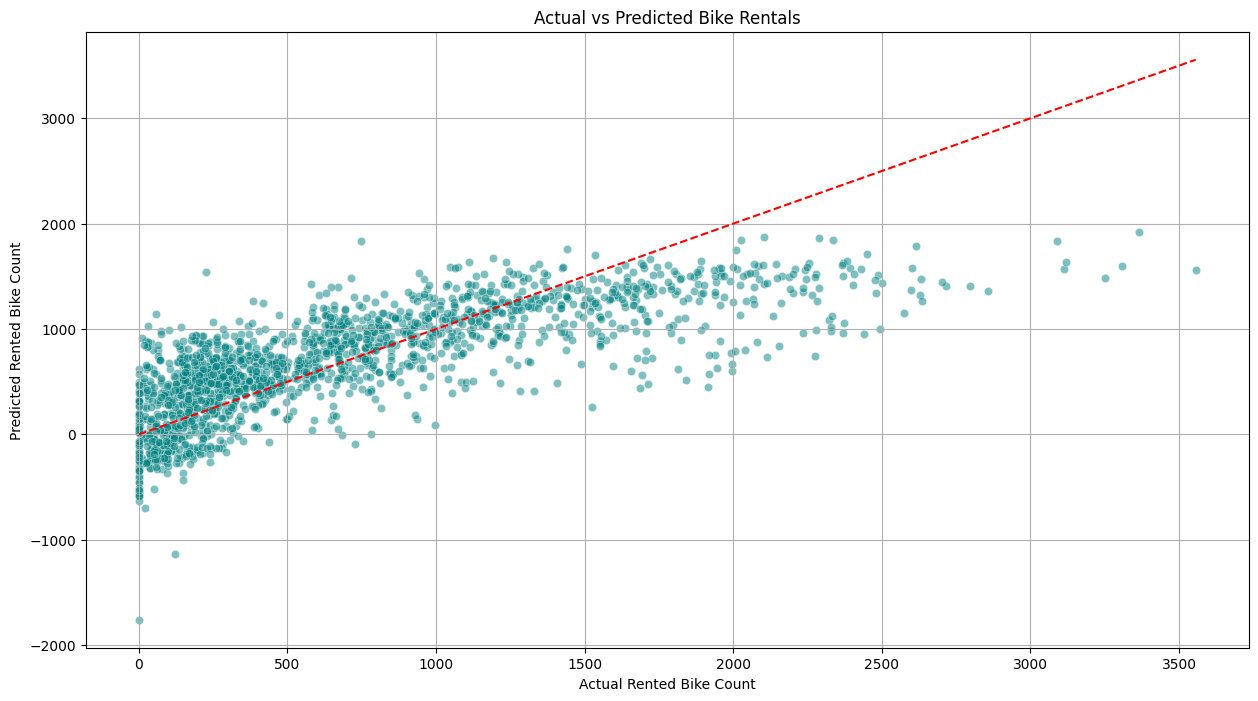

In [38]:
# Creating the DataFrame for comparison
comparison_df = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})

# Plotting the values
plt.figure(figsize=(15, 8))
sns.scatterplot(x="Actual", y="Predicted", data=comparison_df, alpha=0.5, color="teal")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')  # the ideal line
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual vs Predicted Bike Rentals")
plt.grid(True)
plt.show()


**The above graph interpretation:**

-> If predictions are perfect, all points lie on the red dashed line.

-> Scattered points away from the line = prediction error.

-> Dense clustering around the line indicates good model performance.

# **8. Model Saving**

In [64]:
import joblib

joblib.dump(model, '/content/drive/MyDrive/GitHub-Repo-Projects/linear_regression_seoul_bike_data/linear_regression_rented_bike_model_v1.pkl')

['/content/drive/MyDrive/GitHub-Repo-Projects/linear_regression_seoul_bike_data/linear_regression_rented_bike_model_v1.pkl']

# **9. Loading Model and Testing**

In [66]:
loaded_model = joblib.load("/content/drive/MyDrive/GitHub-Repo-Projects/linear_regression_seoul_bike_data/linear_regression_rented_bike_model_v1.pkl")

# Using the loaded model for prediction
loaded_model.predict(X_test[:5])

array([ 728.49334164, 1025.20783283, 1114.41262872, 1409.62123642,
        501.22245766])

             --- Linear Regression Model Training and Testing Ended here ---